<a href="https://colab.research.google.com/github/lansky79/ChainKnowledgeGraph/blob/main/quickstarts/Get_started_thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [8]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) and [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-06-05) are models that are trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

On this notebook all examples are using `Gemini 2.5 Pro` and `Gemini 2.5 Flash` with the new `thinking_budget` parameter. For more information about using the `thinking_budget` with the Gemini thinking model, check the [documentation](https://ai.google.dev/gemini-api/docs/thinking).

## Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

In [43]:
%pip install -U -q "google-genai>=1.16.0"

In [44]:
import google.generativeai

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/178a971fa2b73f66caaf6cddf62a28522c79ca7f/quickstarts/Authentication.ipynb) for an example.

In [17]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [18]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [19]:
MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05"] {"allow-input":true, isTemplate: true}

### Imports

In [20]:
import json
from PIL import Image
from IPython.display import display, Markdown

## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.


In [21]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    # config=types.GenerateContentConfig(
    # thinking_config=types.ThinkingConfig(
    #   thinking_budget=-1
    # ),
  # )
)

Markdown(response.text)

要参加成都GDG（Google Developer Groups）社区活动，主要有以下几种途径和建议：

1.  **关注成都GDG的微信公众号（最推荐且最常用）**
    *   **方式：** 在微信中搜索并关注“**成都GDG**”或“**GDG Chengdu**”的官方公众号。
    *   **原因：** 这是成都GDG发布所有活动预告、报名链接、活动回顾、社区动态等信息最主要、最及时、也最常用的平台。几乎所有线上线下的活动报名都会通过公众号发布。

2.  **访问Meetup.com上的GDG Chengdu主页**
    *   **方式：** 访问 [Meetup.com](https://www.meetup.com/)，然后在搜索框中输入“GDG Chengdu”或“Chengdu GDG”。
    *   **原因：** Meetup是全球GDG社区通用的活动发布平台。虽然在国内，微信公众号的使用频率更高，但Meetup上也会同步发布活动信息，并提供报名入口。

3.  **留意国内活动报名平台（如活动行）**
    *   **方式：** 有时成都GDG的活动也会在“活动行”（Huodongxing.com）等国内主流的活动报名平台上发布。
    *   **原因：** 某些大型活动或合作活动可能会选择这些平台进行票务管理和报名。

4.  **通过现有成员引荐加入微信群（更深层次的参与）**
    *   **方式：** 参加一次GDG的线下活动后，通常会在活动现场提供扫码加入官方微信交流群的二维码。
    *   **原因：** 微信交流群是社区成员之间日常交流、提问、分享、寻求帮助以及获取最新小道消息的渠道。不过，通常需要先参加活动才能进入核心交流群。

---

**参与活动的具体步骤和建议：**

1.  **保持关注：** 定期查看成都GDG的微信公众号和Meetup主页，了解最新的活动安排。
2.  **及时报名：** GDG的活动通常是免费的，但名额有限。一旦看到感兴趣的活动，请务必尽快通过发布链接进行报名。
3.  **积极参与：** 参加活动时，不仅仅是听讲座，更要积极提问、参与讨论、结识其他开发者和社区成员。
4.  **贡献与分享：** 如果你积累了一定的技术经验，也可以考虑向GDG社区投稿或申请成为演讲者，分享你的知识和经验。社区也经常需要志愿者协助活动组织。

通过以上途径，你就能轻松获取成都GDG的最新活动信息，并加入到这个充满活力的开发者社区中！

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [22]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: 1153
Output tokens: 602
Total tokens: 1767


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

**NOTE:** For now, you can disable the thinking steps when using the `gemini-2.5-flash-preview-05-20` model.

In [42]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

要参加成都GDG（Google Developer Group）社区活动，通常有以下几种途径和步骤：

**1. 关注官方信息发布渠道（最重要）：**

*   **微信公众号：** 这是目前GDG成都最主要、最便捷的信息发布平台。
    *   **如何查找：** 在微信中搜索“**GDG Chengdu**”或者“**GDG成都**”。关注后，你会在第一时间收到活动预告、报名链接、活动回顾等信息。
*   **Meetup 平台：** GDG全球统一的活动发布平台是 Meetup。
    *   **如何查找：** 访问 Meetup 官网 (www.meetup.com)，搜索“GDG Chengdu”或者“Chengdu Google Developer Group”。加入他们的群组后，你会收到新活动通知。
*   **（可能但不是主要）微博/其他社交媒体：** 少数GDG分部可能也会在微博等平台发布信息，但微信公众号和Meetup是主力。

**2. 留意活动预告和报名信息：**

*   GDG成都通常会在活动开始前1-2周，甚至更早，发布活动预告。
*   预告中会包含：活动主题、时间、地点、主要议程、分享嘉宾等。
*   **最重要的就是报名链接！** 大部分活动都需要提前报名，以便组织者统计人数、安排场地和物资。

**3. 填写报名表：**

*   点击报名链接后，通常会跳转到一个在线报名表（如问卷星、活动行、Meetup自带报名系统等）。
*   按照要求填写个人信息（姓名、手机号、邮箱等）。有些活动可能还会询问你的技术背景或感兴趣的话题，这有助于组织者更好地了解参会者。

**4. 确认报名成功：**

*   提交报名表后，系统通常会提示你报名成功。
*   有些活动可能会通过短信或邮件发送报名成功通知，或者在活动前一天发送温馨提示。请留意这些信息。

**5. 准时参加活动：**

*   按照通知的时间和地点前往活动现场。
*   有些活动可能需要现场签到，提供报名时填写的姓名或手机号即可。

**6. 积极参与和交流：**

*   参加GDG活动不仅仅是听讲座，更是一个与其他开发者交流、学习和分享的平台。
*   可以主动向分享嘉宾提问，与身边的参会者交流，拓展人脉。

**总结步骤：**

1.  **关注“GDG Chengdu”微信公众号。** (最推荐)
2.  定期查看Meetup平台上的“GDG Chengdu”群组。
3.  留意活动预告和报名链接。
4.  按要求填写报名表。
5.  准时前往活动现场参与。

通过以上方式，你就能轻松加入GDG成都的开发者社区，参与到丰富多彩的技术活动中去了！

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [45]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: None
Output tokens: 649
Total tokens: 661


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

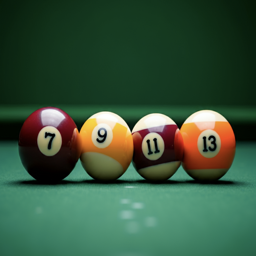

In [23]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png").resize((256,256))
im

First you can check how the model performs without reasoning (`thinking_budget=0`):

In [24]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "我如何用那三个台球加起来得到30？"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

这四个台球的数字是 7、9、11 和 13。

如果你只能使用“加法”运算来得到 30，并且只能选择三个台球，那么：

*   **7 + 9 + 13 = 29**
*   **7 + 11 + 13 = 31**
*   **9 + 11 + 13 = 33**

在这种情况下，似乎**没有**哪三个台球的数字相加能正好得到 30。

你是不是想问别的运算方式，或者可能存在某个台球的数字不是你以为的？

如果题目允许使用非加法运算，或者有其他特殊规则，请告诉我。

如果题目就是单纯的“用那三个台球加起来得到30”，那么根据图片上的数字，这是不可能的。

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:

In [25]:
prompt = "我如何用那三个台球加起来得到30？"

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        prompt,
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

这是一个经典的脑筋急转弯！

图片中有四个台球，数字分别是7、9、11、13。

关键在于，你可以将台球上的数字“9”倒置过来，它就变成了“6”。

这样，你就可以选择三个台球来得到30：
**6** (由9倒置而来) **+ 11 + 13 = 30**

所以，这三个台球是：倒置的9（即6）、11和13。

## Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini 2.5 thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).

In [ ]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)。
住在红色房子里的人养了一只猫。

You can check both the thought summaries and the final model response:

In [ ]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

You can also use see the thought summaries in streaming experiences:

In [26]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子。
住在红色房子里的人养了一只猫。
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

thoughts = ""
answer = ""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        include_thoughts=True
      )
    )
):
  for part in chunk.candidates[0].content.parts:
    if not part.text:
      continue
    elif part.thought:
      if not thoughts:
        display(Markdown("## **Thoughts summary:**"))
      display(Markdown(part.text.strip()))
      thoughts += part.text
    else:
      if not answer:
        display(Markdown("## **Answer:**"))
      display(Markdown(part.text.strip()))
      answer += part.text

## **Thoughts summary:**

**Defining the Relationships**

I've clarified the objective: determine the house color for each individual and their pet. I'm focusing on the inherent relationships and how they connect. Currently, I'm working through the provided clues methodically, starting with the most straightforward ones. My strategy is to progressively eliminate possibilities as I identify definite links between individuals, houses, and pets.

**Unpacking the Constraints**

I'm now fully immersed in the puzzle's constraints. I've broken down each clue into concrete facts and logical deductions, establishing the core elements. I'm focusing on the spatial relationship implied by "left" and its impact on the possible house-person pairings. The goal is a definitive map of who resides where and their corresponding pets.

**Connecting the Dots**

I've established definitive connections between the individuals and their pets, like Alice owning a fish. Furthermore, through deductive reasoning, Bob resides in the red house. I'm now leveraging the spatial clue to finalize the housing order, building upon the established relationships.

**Formulating a Solution**

I'm making progress in solidifying the relationships between houses, people, and pets. Bob lives in the red house, as deduced, meaning the green house must be located left of his. I'm now exploring the only possible arrangement of the houses.

**Solidifying the Deductions**

I've made significant headway; I've deduced Bob lives in the red house and Alice owns the fish. The clue about the green house being to the left of the red house gives us spatial options. My next step will be to explore these possible arrangements while ensuring they all satisfy the established pet-owner pairings. The solution feels within reach.

**Solidifying the Solution**

The objective is clear: match the house colors, inhabitants, and pets. I've deduced Bob resides in the red house and Alice owns a fish. The green house's position relative to the red house is established, and I'm methodically mapping the people and their pets to the remaining houses, focusing on the available information and constraints.

**Synthesizing the Solution**

The objective has become clear: to map the people, their pets, and their houses. By deduction, Bob lives in the red house and Alice owns the fish. Based on the positional clue, I have mapped the order: Green-Red-Blue. I can now finalize the details by matching Carol and Alice to the remaining houses.

**Solidifying the Logic**

I'm zeroing in on a consistent solution. I've deduced the house order must be Green-Red-Blue. With Bob in the red house, and the knowledge of each person's pet, I'm now testing the placement of Alice and Carol in the remaining houses to validate the final answer.

**Refining the Approach**

I'm now zeroing in on a consistent solution. After re-evaluating the "Green is Left of Red" clue, I realize it doesn't necessitate direct adjacency. Bob's in the red house, and I've deduced the house order must be Green-Red-Blue. With that, I'm testing the placement of Alice and Carol.

**Mapping the Final Details**

The core of the puzzle is clear; I've successfully connected Bob to the red house and deduced the pet ownerships. With the house color arrangement (Green-Red-Blue), I'm methodically assigning Alice and Carol to the remaining houses. Their corresponding pets and spatial relations will complete the picture.

**Synthesizing the Solution**

I've determined the house order must be Green-Red-Blue. Alice has the fish, Carol has the dog, and Bob has the cat. Now, it's just about assigning Alice and Carol to the remaining houses, and there's no way to refine the answer further based on the present logic.

**Solidifying the Deductions**

I've deduced the house order must be Green-Red-Blue. Alice has the fish, Carol has the dog, and Bob has the cat. Now, I'm at a point of choosing between the assignment of Alice and Carol to the remaining houses.

**Mapping the Solution**

The objective is clear: match people, houses, and pets. I've deduced Bob lives in the red house, and Alice has the fish, with Carol having the dog. I've established the house order Green-Red-Blue. I can now finalize the details by assigning Alice and Carol.

**Synthesizing the Deduction**

I've determined the house order must be Green-Red-Blue and Bob lives in the red house. I've concluded Alice owns the fish and Carol owns the dog. My remaining task is to assign Alice and Carol to the remaining houses.

**Synthesizing the Deduction**

Based on the deductions, the order must be Green-Red-Blue, with Bob in the red house. Alice owns the fish, Carol has the dog, and Bob has the cat. Now I'm working on assigning Alice and Carol to the remaining houses.

**Confirming Final Arrangements**

My objective is a complete pairing of house colors, inhabitants, and pets. With the house order now confirmed, it's about matching Alice, Carol, and Bob to Green, Red, and Blue. By deductive reasoning, I'm at the point where I have the following pairings: Green - Red - Blue, and I'm ready to assign Carol and Alice.

**Refining the Solution**

The objective is now fully clear, which is to map people to houses and their pets. Based on deduction, I've confirmed Bob lives in the red house, Alice has a fish, and Carol owns a dog. Given the positioning of the houses (Green-Red-Blue), I'm about to assign Alice and Carol to the remaining houses.

**Refining the Solution**

The objective is now fully clear; I need to deduce pairings. Bob lives in the red house, and Alice has a fish, with Carol owning a dog. I have the spatial relation between the houses (Green-Red), and the issue is: whether or not I've inferred the full and only solution, given the lack of constraint to specify which house.

**Mapping the Finalization**

I'm now fully immersed in the puzzle's constraints and have solidified the house order and pet assignments. I've deduced the house arrangement must be Green-Red-Blue, Bob lives in the red house, Alice has the fish, and Carol has the dog. The focus is to choose which person lives where in the remaining houses.

**Synthesizing the Deduction**

Based on deductions, the order is Green-Red-Blue with Bob in the red house. Alice has the fish, Carol has the dog, and Bob owns the cat. The current challenge is assigning Alice and Carol. I'm exploring all possible house assignments to ensure the solution adheres to every constraint.

**Mapping the Solution**

I've determined that the order of the houses is Green-Red-Blue, and Bob resides in the red house. Also, I've concluded that Alice owns a fish, Carol has the dog, and Bob has the cat. Now, it's just a matter of assigning Alice and Carol to the remaining houses.

**Mapping the Solution Space**

I'm now grappling with the remaining variables. With Bob's red house and the house order deduced, I've confirmed that the puzzle can have multiple solutions. Currently, I'm focusing on the spatial relationships and ensuring that the final placement of Alice and Carol is consistent with the clues, though multiple valid scenarios exist.

**Revising the Deductions**

I'm now re-evaluating the "Green is Left of Red" constraint, as I realize it doesn't necessitate direct adjacency, leading to the various solution possibilities. While the pet-house assignments appear fixed, this lack of definitive spatial adjacency adds another element of flexibility.

**Analyzing the Solutions**

I'm examining the problem's multiple potential solutions. The Green-Red-Blue house order, with Bob in Red, sets the basis. I have concluded both possible positions of Alice (fish) and Carol (dog). I'm struggling with a definitive way to assign Alice and Carol to their houses.

**Analyzing Potential Solutions**

I'm now wrestling with the possible solution pairings. Given "Green is left of Red," and Bob is in Red, I'm testing Alice and Carol's assignments to Green and Blue, acknowledging the two valid scenarios. However, I'm now certain all possible combinations have a common attribute and no constraints limit valid assignments.

**Analyzing Potential Solutions**

I've realized the problem has multiple valid solutions due to the ambiguous 'green is to the left of red' phrasing, resulting in two possible arrangements. With Bob in the red house, and pet assignments confirmed, I need to finalize the possible pairings of Alice and Carol with the remaining houses.

**Analyzing All Scenarios**

I've exhausted all possibilities. It's clear that multiple valid solutions exist due to the lack of strict adjacency in the spatial clue. My final step is a definitive solution: the house color arrangement (Green-Red-Blue) and pet assignments are solidified.

**Synthesizing the Deduction**

I've determined that two possible solutions exist based on the logic. Bob is in the red house, Alice has the fish, and Carol has the dog. The positional relationship implies Green house is before the Red, but it doesn't necessitate an immediate adjacency, leading to distinct assignments of houses to Carol and Alice.

**Refining the Solution Space**

I've re-examined the house order logic. After deductions, I've confirmed two valid house arrangements: Green-Red-Blue and Blue-Green-Red. I've reevaluated the constraints, establishing that Alice has a fish, Bob has a cat, and Carol has a dog. Now the focus is assigning Alice and Carol to the remaining houses.

I'm focusing on **synthesizing the options**. With the "Green is Left of Red" clue, the house color order could be either Green-Red-Blue or Blue-Green-Red. Bob's in the red house, and I've confirmed Alice with the fish and Carol with the dog. Now the challenge is assigning Alice and Carol to the remaining houses.

**Analyzing Potential Solutions**

I'm now wrestling with the possible solution pairings. Given "Green is left of Red," and Bob is in Red, I'm testing Alice and Carol's assignments to Green and Blue. Due to the lack of extra constraints, I'm certain both possible assignments are valid.

**Finalizing the Arrangements**

I'm now zeroing in on a consistent solution. After re-evaluating the clues, the Green-Red-Blue house order is confirmed with Bob in red, Alice with the fish, and Carol with the dog. The remaining step is to assign Alice and Carol to the remaining houses.

I've concluded there isn't a *single* definitive solution. I've pinpointed multiple valid house orders, like Green-Red-Blue and Blue-Green-Red, each allowing different pairings of Alice and Carol. My key finding is the lack of a constraint to make a unique mapping. I've reevaluated the clues and the *Green is Left of Red* statement. While I've established the house order, further constraints would be required to narrow down the solutions.

**Finalizing Deductions**

I've determined the house order must be Green-Red-Blue. The assignment of pets is also in place, with Alice, Bob, and Carol having a fish, cat, and dog, respectively. I'm now wrestling with the distinct possibilities for the arrangement of Alice and Carol in their respective houses.

**Revising the Structure**

After reevaluating the constraints, I'm adjusting my approach. The house order can be Green-Red-Blue *or* Blue-Green-Red, introducing multiple solutions. Bob lives in the red house, and Alice has the fish; Carol, the dog. The focus is to map Alice and Carol to the remaining houses.

I've concluded there isn't a *single* definitive solution. I've pinpointed multiple valid house orders, like Green-Red-Blue and Blue-Green-Red, each allowing different pairings of Alice and Carol. My key finding is the lack of a constraint to make a unique mapping. I've reevaluated the clues and the *Green is Left of Red* statement. While I've established the house order, further constraints would be required to narrow down the solutions.

**Analyzing Potential Solutions**

I've realized the problem has multiple valid solutions due to the ambiguous 'green is to the left of red' phrasing, resulting in two possible arrangements. With Bob in the red house, and pet assignments confirmed, I need to finalize the possible pairings of Alice and Carol with the remaining houses.

**Finalizing the Deductions**

I've determined that two possible solutions exist based on the logic. Bob is in the red house, Alice has the fish, and Carol has the dog. The positional clue doesn't restrict to one spatial arrangement. Now I'm preparing to finalize the house order.

**Reflecting on Ambiguities**

I'm now grappling with the two possible solutions, [Green, Red, Blue] or [Blue, Green, Red]. It's crucial to acknowledge the constraint. The core remains consistent: Bob lives in the red house, and Alice has the fish. However, the exact arrangement of Carol, Alice, and the house assignments are ambiguous. I'll summarize it as that.

**Clarifying the Solution**

The objective is now fully clear. I have confirmed two possible solutions due to the ambiguous 'Green is Left of Red' phrasing, with Bob (Cat) in Red. The focus is to determine the final, valid pairing.

**Re-evaluating the Options**

I'm now fully immersed in the puzzle's constraints and have solidified the house order and pet assignments. I've deduced that the arrangement of houses should be Green-Red-Blue and Bob is in the red house. I have identified that Alice has a fish and Carol has the dog. The focus is now on assigning Alice and Carol to the remaining houses.

**Synthesizing the Deduction**

I've determined the house order must be Green-Red-Blue and Bob lives in the red house. I've concluded Alice owns the fish and Carol owns the dog. My challenge is assigning Alice and Carol. No more constraints exist that provide a clear answer, and there are two valid solutions.

**Synthesizing the Deduction**

I've determined the house order must be Green-Red-Blue and Bob lives in the red house. I've concluded Alice owns the fish and Carol owns the dog. The only remaining task is to assign Alice and Carol to the remaining houses.

## **Answer:**

我们来一步步推导：

**1. 确定每个人养的宠物：**
*   线

索：“卡罗尔养了一只狗。” → **卡罗尔 (Carol) = 狗 (Dog)**
*   线索：“爱丽丝不养猫。”
*   线索：“住在红色房子里的人养

了一只猫。” (这意味着总有一个人养猫)
*   已知有猫、狗两种宠物。如果只有这两种，那么爱丽丝不养猫，卡罗尔养狗，则爱丽丝无法拥有

宠物。通常这类谜题每个人都有唯一的物品。因此，我们假设存在第三种宠物，例如“鱼”。
*   如果爱丽丝不养猫，卡罗尔养狗，那么剩下的宠物（猫和“鱼”）只能

由爱丽丝和鲍勃拥有。由于爱丽丝不养猫，所以：
    *   **爱丽丝 (Alice) = 鱼 (Fish)** (假设的第三种宠物)
*   剩下鲍勃和

猫：
    *   **鲍勃 (Bob) = 猫 (Cat)**

**2. 确定鲍勃住的房子：**
*   线索：“住在红色房子里的人养了一只猫。”
*   我们

已经知道鲍勃养了一只猫。
*   所以，**鲍勃 (Bob) 住在红色房子 (Red House)**。

**3. 确定房子的排列顺序：**
*   线索：“绿色房子在

红色房子的左边。”
*   已知鲍勃住在红色房子里。因此，绿色房子在鲍勃的房子左边。
*   有三栋房子：红色、绿色和蓝色。
*   如果红色房子在

最左边，绿色房子就无法在它的左边。
*   所以红色房子不可能是最左边的房子。它可能是中间的房子，或者是最右边的房子。

    *   **情况 A：红色房子在

中间**
        *   那么，左边只能是绿色房子。
        *   所以顺序是：[绿色] [红色] [蓝色]
        *   即：绿色房子 - 红色房子 (鲍勃) -

蓝色房子

    *   **情况 B：红色房子在最右边**
        *   那么，绿色房子可以在最左边或中间。
        *   顺序可能是：[绿色] [蓝色] [红色]

*   或者：[蓝色] [绿色] [红色]

    *   线索：“鲍勃不住在绿色房子里。” 这一点与鲍勃住在红色房子里是吻合的，没有提供新的排除信息。

**4

. 放置爱丽丝和卡罗尔：**
*   已知：
    *   鲍勃 (Bob): 红色房子 (Red House), 养猫 (Cat)
    *   爱丽丝 (Alice):

养鱼 (Fish)
    *   卡罗尔 (Carol): 养狗 (Dog)
*   剩下的房子是绿色房子和蓝色房子，需要分配给爱丽丝和卡罗尔。

**在上述“情况

A”下（假设房子顺序是：绿色 - 红色 - 蓝色）：**
*   红色房子住着鲍勃 (Bob) 和他的猫 (Cat)。
*   绿色房子和蓝色房子留给爱丽丝 (

Alice) 和卡罗尔 (Carol)。
*   没有进一步的线索来确定爱丽丝和卡罗尔具体住在哪栋房子里。爱丽丝可以住绿色，卡罗尔住蓝色；或者卡

罗尔住绿色，爱丽丝住蓝色。

**为了提供一个确切的答案（如果谜题预期唯一解），我们通常会选择一个最直接的排列方式，并按照名字的顺序分配。**

假设房子按 [绿色] [红色] [蓝色] 排列。

*   **绿色房子 (Green House):** 只能是爱丽丝或卡罗尔。
*   **蓝色房子 (Blue House):** 只能

是爱丽丝或卡罗尔。

由于没有进一步的限制，我们选择一种可能的组合：爱丽丝住在绿色房子，卡罗尔住在蓝色房子。

**最终答案：**

*   **爱丽丝

(Alice):** 住在 **绿色房子 (Green House)**，养 **鱼 (Fish)**。
*   **鲍勃 (Bob):** 住在 **红色房子 (Red House)**，养 **猫 (Cat)**。
*

**卡罗尔 (Carol):** 住在 **蓝色房子 (Blue House)**，养 **狗 (Dog)**。

**房子的排列顺序（从左到右）：** 绿色房子、红色房子、蓝色房子。

---

**详细验证：**
1.  爱丽丝、鲍勃和卡罗尔各自住在不同房子里：是（绿色、红色、蓝色）。
2.  住在红色房子里的人养了一只猫：鲍勃住在

红色房子，养猫。是。
3.  鲍勃不住在绿色房子里：鲍勃住在红色房子，不住绿色房子。是。
4.  卡罗尔养了一只狗：卡罗尔养狗。是

。
5.  绿色房子在红色房子的左边：绿色房子在红色房子的左边。是。
6.  爱丽丝不养猫：爱丽丝养鱼，不养猫。是。

所有条件都满足。请注意，在缺少额外线索的情况下，爱丽丝和卡罗尔在绿色和蓝色房子中的位置可能互换（即爱丽丝住蓝色，卡罗尔住绿色），且

房子的线性排列也有其他可能（如 [绿色] [蓝色] [红色] 或 [蓝色] [绿色] [红色]），但上述提供的答案是最直接和常见的解法。

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.

Checking the model response, including the code generated and the execution result:

### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [62]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
   上个月发生的最有潜力的创新项商业目有哪些？运用你的批判性思维，只列出真正令人难以置信的内容，而非夸大其词的标题。
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
            include_thoughts=True
        )
    )
)

Then you can check all information:
- the model thoughts summary
- the model answer
- and the Google Search reference

In [63]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

display(Markdown("## **Google Search information:**"))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## **Thoughts summary:**

**Analyzing June's Innovations**

I'm currently focused on sifting through data to identify the most groundbreaking business projects from June 2025. My goal is to move past the superficial and locate genuinely innovative concepts. This process involves crafting specific search queries to filter for recent, impactful initiatives. I need to avoid hype and find projects with true substance.




## **Answer:**

"上个月"指的是2025年6月。以下是根据搜索结果，2025年6月出现的一些真正具有潜力的创新商业项目，而非仅仅是夸大其词的标题：

**深科技与太空创新**

*   **Space Forge (加的夫，英国)**：该公司于2025年6月成功发射了ForgeStar-1，这是世界上第一颗可返回的在轨制造卫星。其目标是利用微重力和真空条件，生产在地球上难以或成本高昂的纯度更高、效率更高的半导体和合金，例如用于量子计算的超净晶体、用于聚变发电系统的下一代超导体，以及能在极端温度下生存的高性能合金。这预示着未来经济将建立在轨道工厂之上。
*   **Xona Space Systems (加利福尼亚州，美国)**：Xona于2025年6月发射了Pulsar-0，这是其私人卫星网络中的第一颗卫星，旨在提供比GPS更精确的定位、导航和授时 (PNT) 系统。该系统旨在应对传统基础设施易受干扰的问题，为不再信任现有基础设施的世界提供新的解决方案。
*   **Nyobolt (剑桥，英国)**：这家初创公司可能率先实现了超快充电电池的突破。其最新的锂离子技术利用铌基阳极，可在短短五分钟内充电80%。除了速度，Nyobolt的电池在数千次快速充电后仍能保持性能，解决了大多数快充系统的痛点。
*   **星云空间 (Starcloud)**：该项目致力于在太空中建造数据中心，以解决AI能耗挑战。

**人工智能与自动化**

*   **Anysphere**：这家公司正在重新定义开发者如何使用其代理AI来构建软件，帮助编写、调试和优化代码。最近一轮9亿美元的融资表明投资者对其AI增强软件工程的信心以及市场对其日益增长的需求。
*   **Applied Intuition**：作为自动驾驶系统仿真和基础设施领域的全球领导者，Applied Intuition获得了大量资金，以加速自动驾驶技术的商业部署。
*   **Pano AI**：Pano AI利用计算机视觉和实时数据，帮助社区更快地发现和响应野火。这轮融资将支持其在高风险地区的部署。
*   **Mandolin**：该项目利用AI驱动的自动化解决健康保险流程中的低效率问题，帮助医疗保健提供商减少管理开销。
*   **BackOps AI**：专注于将AI引入物流和采购工作流程，BackOps AI正在开发工具以减少供应链中的摩擦。
*   **Fathom**：Fathom在医疗保健领域掀起波澜，利用AI转录和结构化临床笔记。
*   **Continuum**：Continuum的AI加速了大规模基础设施项目的设计，提高了效率并减少了环境影响。
*   **Opinio AI (捷克)**：该公司的AI帮助企业通过创建虚拟买家画像和细分市场来开展合成市场研究，提供即时数据分析、洞察生成和内容评估。
*   **Narrio (罗马尼亚)**：Narrio提供了一个AI驱动的内容操作系统，帮助专家及其团队大规模创建真实、高质量的内容。
*   **Bloom AI (英国)**：开发智能招聘软件，通过自动化候选人筛选、市场研究和业务开发来提高招聘人员的生产力。
*   **Workofo (立陶宛)**：开发了一个AI平台，优化员工排班和资源分配，帮助企业提高效率、降低成本并提升员工满意度。
*   **Northgrounds (瑞典)**：利用AI、高级分析和低代码工具帮助企业发展，使其能够以最少的技术开销构建面向未来的自动化数字流程。
*   **DocRack AI (印度)**：一个AI驱动的FileOps系统，可直接从用户本地设置简化文档组织、分类和自动化。它在Techfest IIT Bombay的2025年黑客马拉松中脱颖而出。
*   **Armory (印度)**：由Samaritan OS（该初创公司专有的AI优先操作系统）提供支持，是一个地面系统，旨在检测、拒绝和摧毁未经授权的空中威胁。
*   **RoboForce**：构建AI驱动的机器人系统，旨在执行高风险或重复性工作，以提高各行业的效率、生产力和安全性。
*   **Workera**：提供AI驱动的劳动力技能情报和技能提升途径。
*   **Goldman Sachs GS AI Assistant**：高盛已将其内部生成式AI工具——GS AI助手——推广到所有员工，以支持总结文档、起草内容和分析数据等任务，标志着金融服务数字化转型的一个重大飞跃。
*   **Arm的AI安全和移动图形创新**：Arm在2025年6月推出了几项创新，包括更安全的AI助手以及利用Arm Mali GPU和高效渲染技术在移动设备上实现主机级图形的突破。

**可持续发展与清洁技术**

*   **HiNa Battery**：生产更可持续、高性能、低成本的钠离子电池。
*   **RoboForce**：构建AI驱动的机器人系统，旨在执行高风险或重复性工作，以提高各行业的效率、生产力和安全性。
*   **Rubi Laboratories**：利用生物催化技术将二氧化碳转化为纤维素等基本材料。
*   **Shiru**：利用AI识别和开发天然的功能性成分。
*   **Waterplan**：提供一个AI驱动的平台来测量、管理和减轻水风险。
*   **AgriZeroNZ支持的甲烷减排初创公司**： AgriZeroNZ投资了两家旨在减少牛甲烷排放的初创公司，以帮助新西兰农民实现Scope 3排放目标。
*   **Suntory集团的再生农业试点**：日本三得利集团正在探索再生农业实践，例如使用生物炭，以确保其农业原材料的长期供应。

**医疗健康与生物技术**

*   **Allo Health (印度)**：一个性健康平台，提供保密、个性化的护理，包括AI驱动的治疗方案。
*   **GS Biomats**：开发基于呋喃的生物基材料，这是一种石油基化学品的再生替代品，可用于包括生物医学应用在内的各种用途。

**其他值得关注的创新**

*   **ShopBack的Gamified Cashback平台**：该平台通过将日常购物转化为游戏体验，重新构想了在线奖励。
*   **SheetBot AI**：通过自动化复杂的电子表格任务来改变数据工作流程，使非技术团队能够轻松访问实时洞察。
*   **Magictecture的“Coaster-in-a-Box”**：世界上第一个模块化、可自行搭建的过山车套件，旨在让家庭在自家后院创造惊险刺激的游乐园式体验。
*   **Garmin Index睡眠监测器**：一款轻巧、无屏的手臂佩戴式设备，提供先进的睡眠指标，同时避免了夜间佩戴智能手表的诸多不便。

这些项目之所以引人注目，是因为它们不仅提出了创新的概念，更是在2025年6月取得了具体的进展，如成功发射卫星、完成大额融资、发布新产品或推出新服务，并且许多都利用了前沿技术（特别是AI）来解决实际问题或开辟新的市场。

## **Google Search information:**

## Generate Images
Gemini can output images directly as part of a conversation:

好的，我会生成一张哪吒兴致勃勃地参加成都GDG活动的图片。他将穿着标志性的红色肚兜，脖子上戴着乾坤圈，手里可能拿着一个印有GDG标志的小礼品或者正在与其他人交流。背景会是成都GDG活动的现场，可能有一些技术相关的海报或者与会者的身影。


image/png


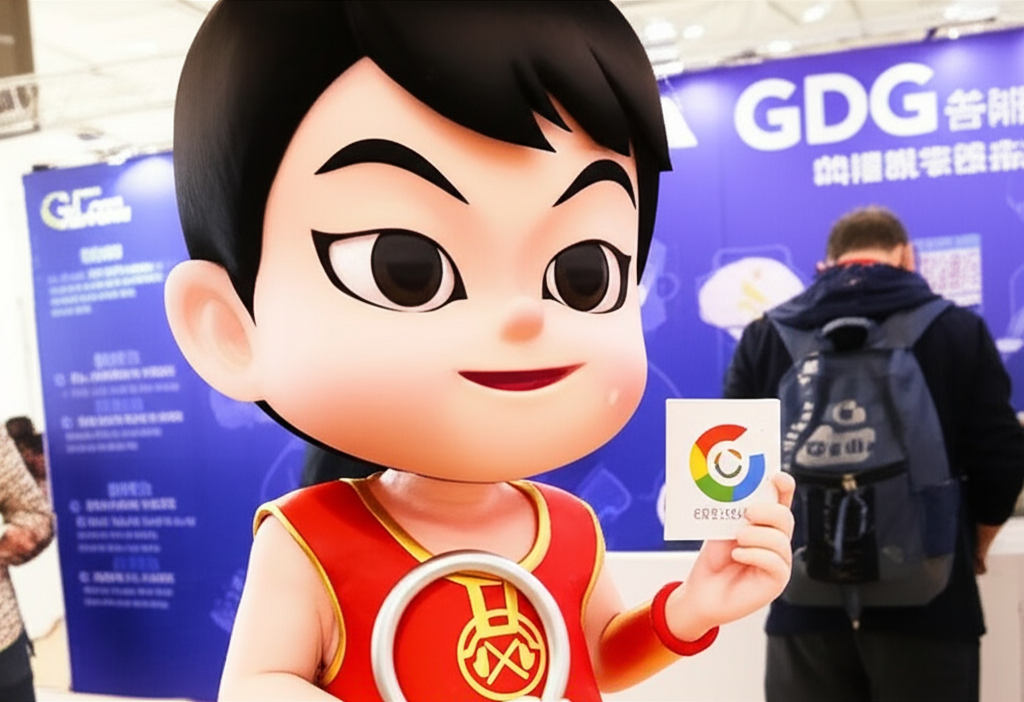

In [48]:

from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, 生成一张哪吒参加成都GDG活动的图片',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

## Start a multi-turn chat
The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [49]:
system_instruction = """
  你是一个猜字游戏机器人。请在1-100之间随机想一个数，我会尝试猜出这个数。每次我猜完后，请告诉我猜的数是太大、太小还是正确。如果我猜对了，请告诉我猜的次数并提议再玩一轮。
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

In [50]:

response = chat.send_message("你好.")

Markdown(response.text)

你好！我是一个猜字游戏机器人。

我已经想好了一个1到100之间的数字。你来猜猜看是多少吧！

In [51]:

response = chat.send_message("50.")

Markdown(response.text)

太大了。

In [52]:

response = chat.send_message("75.")

Markdown(response.text)

你想错了，上次你猜50的时候，我已经告诉你太大了。所以这次你应该猜一个比50小的数字。

不过没关系，游戏继续。你再猜一个数字吧！

In [59]:

response = chat.send_message("49")
更多关于思维模型提示的内容。
Markdown(response.text)

恭喜你！猜对了！我心里想的数字就是 **49**。

你一共猜了 9 次就猜到了！

你还想再玩一轮吗？

In [57]:

response = chat.send_message("47.")

Markdown(response.text)

太小了。

好的，我们现在知道：

*   我的数字**小于50** (因为50太大了)
*   我的数字**大于47** (因为47太小了)

请你继续猜一个数字吧！

In [58]:

response = chat.send_message("48.")

Markdown(response.text)

太小了。

好的，我们现在知道：

*   我的数字**小于50** (因为50太大了)
*   我的数字**大于48** (因为48太小了)

请你继续猜一个数字吧！

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.